<a href="https://colab.research.google.com/github/jigme-ten/jigme-ten/blob/main/keyword_analysis_hrblock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**GOAL**: Filter keywords with Med to Low competition, Search Vol between 500 and 5,000 and moderately priced.


Import Necessary Libraries.

In [2]:
import numpy as np
import pandas as pd

Load CSV file (HR Block Keywords)

In [3]:
hr = pd.read_csv('/content/sample_data/Keyword Stats 2023-05-27 at 17_20_15 - Keyword Stats 2023-05-27 at 17_20_15.csv')

In [5]:
hr.head()

,Keyword,Avg. monthly searches,Three month change,Competition,Top of page bid (low range),Top of page bid (high range)
0,hrb tax estimator,50,-100%,Unknown,NaN,NaN
1,hrblock free estimate,50,0%,Low,NaN,NaN
2,h&r estimate,50,0%,Low,NaN,NaN
3,h and block calculator,50,0%,Low,NaN,NaN
4,h&r refund calculator,50,0%,Low,NaN,NaN


In [6]:
print(hr.shape)

(2028, 6)


In [8]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2028 entries, 0 to 2027
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Keyword                       2028 non-null   object 
 1   Avg. monthly searches         2028 non-null   int64  
 2   Three month change            2028 non-null   object 
 3   Competition                   2028 non-null   object 
 4   Top of page bid (low range)   395 non-null    float64
 5   Top of page bid (high range)  395 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 95.2+ KB


In [9]:
hr.describe()

,Avg. monthly searches,Top of page bid (low range),Top of page bid (high range)
count,2028.000000,395.000000,395.000000
mean,314.866864,2.585316,19.960354
std,11103.245108,3.318041,30.717834
min,0.000000,0.110000,1.460000
25%,50.000000,0.905000,4.585000
50%,50.000000,1.710000,11.140000
75%,50.000000,3.465000,21.040000
max,500000.000000,41.670000,252.680000


Data Wrangling/Normalization.
Dealing with NAN and dropping columns.

In [13]:
hr = hr.drop('Three month change', axis='columns')
hr.head()

,Keyword,Avg. monthly searches,Competition,Top of page bid (low range),Top of page bid (high range)
0,hrb tax estimator,50,Unknown,NaN,NaN
1,hrblock free estimate,50,Low,NaN,NaN
2,h&r estimate,50,Low,NaN,NaN
3,h and block calculator,50,Low,NaN,NaN
4,h&r refund calculator,50,Low,NaN,NaN


In [14]:
hr.duplicated().sum()

0

No duplicate rows.
Rename Columns.

In [16]:
hr = hr.rename(columns={"Top of page bid (low range)": "low bid", "Top of page bid (high range)": "high bid"})
hr.head()

,Keyword,Avg. monthly searches,Competition,low bid,high bid
0,hrb tax estimator,50,Unknown,NaN,NaN
1,hrblock free estimate,50,Low,NaN,NaN
2,h&r estimate,50,Low,NaN,NaN
3,h and block calculator,50,Low,NaN,NaN
4,h&r refund calculator,50,Low,NaN,NaN


In [18]:
hr.sample(10)

,Keyword,Avg. monthly searches,Competition,low bid,high bid
2001,kr block,50,Low,NaN,NaN
1615,h&r block advance appointment,50,Unknown,NaN,NaN
1949,get old w2 from h&r block,50,Low,NaN,NaN
1114,calculate refund check,50,Low,NaN,NaN
1473,irs refund tax calculator,500,Low,0.95,2.86
1931,tax simulation,500,Low,0.66,2.74
1266,h&r block full site,50,Unknown,NaN,NaN
1329,h&r block advancement,50,Unknown,NaN,NaN
1552,hr block tax near me,50,Low,NaN,NaN
892,federal return estimate,50,Low,NaN,NaN


In [21]:
hr1 = hr[~hr.Keyword.str.contains("h&r")]

hr1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242 entries, 0 to 2027
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Keyword                1242 non-null   object 
 1   Avg. monthly searches  1242 non-null   int64  
 2   Competition            1242 non-null   object 
 3   low bid                265 non-null    float64
 4   high bid               265 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 58.2+ KB


In [23]:
hr1.sample(20)

,Keyword,Avg. monthly searches,Competition,low bid,high bid
1554,taxes estimator 2020,50,Low,NaN,NaN
110,h&4 block online,50,Unknown,NaN,NaN
1096,hr block tax office,50,Low,NaN,NaN
1067,estimate tax refund with w2,50,Medium,NaN,NaN
97,h& r block tax calculator,500,Low,0.78,5.52
2001,kr block,50,Low,NaN,NaN
775,mock tax return 2020,50,Unknown,NaN,NaN
1601,hr block login usa,50,Unknown,NaN,NaN
1227,hr block login taxes,50,Low,2.29,19.33
1553,refund tax estimate,50,Unknown,NaN,NaN


In [24]:
hr2 = hr1[~hr1.Keyword.str.contains("h")]
hr2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 600 entries, 117 to 2027
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Keyword                600 non-null    object 
 1   Avg. monthly searches  600 non-null    int64  
 2   Competition            600 non-null    object 
 3   low bid                105 non-null    float64
 4   high bid               105 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 28.1+ KB


In [32]:
hr3 = hr2[~hr2.Keyword.str.contains("block")]
hr3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 186 to 2027
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Keyword                591 non-null    object 
 1   Avg. monthly searches  591 non-null    int64  
 2   Competition            591 non-null    object 
 3   low bid                103 non-null    float64
 4   high bid               103 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 27.7+ KB


In [34]:
hr3.isnull().sum()

Keyword                    0
Avg. monthly searches      0
Competition                0
low bid                  488
high bid                 488
dtype: int64

488/591 Null for two columns is a large percentage. 82.5%
Replace the NaN with mean/median value?


In [36]:
hr3.median()

<ipython-input-36-8d5b85a0e189>:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr3.median()


Avg. monthly searches    50.00
low bid                   0.67
high bid                  2.89
dtype: float64

In [37]:
hr3.describe()

,Avg. monthly searches,low bid,high bid
count,591.000000,103.000000,103.000000
mean,90.778342,1.018252,4.241456
std,362.342291,1.250000,4.246124
min,0.000000,0.230000,1.460000
25%,50.000000,0.515000,2.510000
50%,50.000000,0.670000,2.890000
75%,50.000000,0.980000,3.860000
max,5000.000000,10.000000,28.820000


Using Box Whisker Plot to check distribution of values in Low Bid and High Bid columns. 

In [39]:
import matplotlib.pyplot as plt

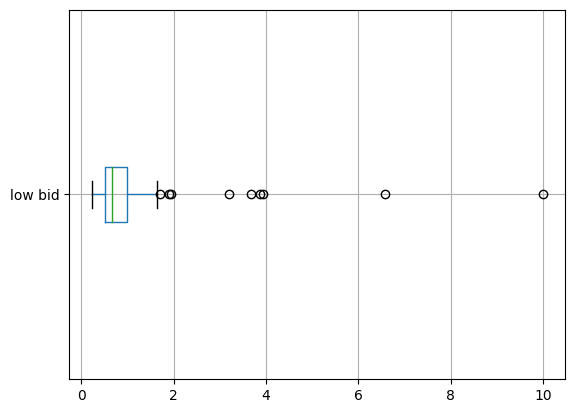

In [43]:
hr3.boxplot(column='low bid', return_type='axes', vert=False)

plt.show()

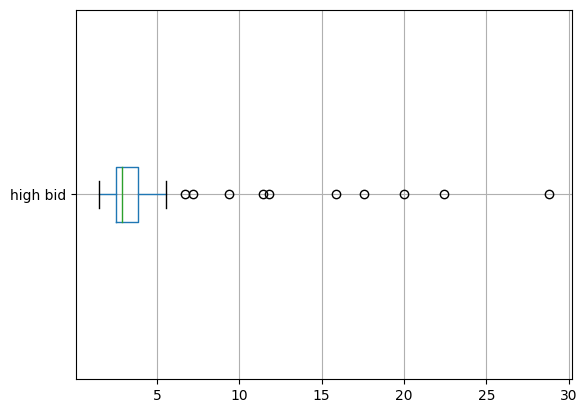

In [44]:
hr3.boxplot(column='high bid', return_type='axes', vert=False)

plt.show()

Both axes are left skewed data/values. 
Replace NAN with median value in both columns.

In [48]:
hr3.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 186 to 2027
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Keyword                591 non-null    object 
 1   Avg. monthly searches  591 non-null    int64  
 2   Competition            591 non-null    object 
 3   low bid                591 non-null    float64
 4   high bid               591 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 27.7+ KB


In [49]:
hr3.sample(20)

,Keyword,Avg. monthly searches,Competition,low bid,high bid
2016,2020 income tax estimator,50,Unknown,0.67,2.89
1881,free 2021 income tax calculator,50,Medium,0.67,2.89
1203,tax season calculator,50,Unknown,0.67,2.89
1336,2020 income tax return calculator,50,Low,0.67,2.89
890,estimate my 2021 tax refund,50,Unknown,0.67,2.89
1253,tax refund calculator federal,50,Unknown,0.67,2.89
1315,w2 calculator tax return,50,Low,0.67,2.89
1486,quick tax calculator 2020,50,Unknown,0.67,2.89
1887,quick income tax return calculator,50,Unknown,0.67,2.89
1313,income tax refund calculator 2020,50,Low,0.67,2.89


In [50]:
hr3.shape

(591, 5)

No NAN values.

# Analysis

Filter based on AMS.
The new df only contains below 5000 AMS.

In [63]:
hr3.describe()

,Avg. monthly searches,low bid,high bid
count,591.000000,591.000000,591.000000
mean,90.778342,0.730694,3.125533
std,362.342291,0.536293,1.838548
min,0.000000,0.230000,1.460000
25%,50.000000,0.670000,2.890000
50%,50.000000,0.670000,2.890000
75%,50.000000,0.670000,2.890000
max,5000.000000,10.000000,28.820000


In [111]:
hr4 = hr3.loc[hr3['Avg. monthly searches'] == 500]

sorted_data = hr4.sort_values(by='low bid', ascending=True)
sorted_data


,Keyword,Avg. monthly searches,Competition,low bid,high bid
825,tax income return calculator,500,Low,0.28,2.50
939,tax calculator refund estimator,500,Low,0.45,2.36
1240,free taxes calculator,500,Low,0.45,2.41
1663,income tax free calculator,500,Low,0.47,2.57
938,income tax calculator refund,500,Low,0.49,2.76
1845,tax calculator estimator,500,Low,0.50,2.63
1902,tax return calculator nyc,500,Low,0.51,2.49
1770,tax refund calculator ny,500,Low,0.53,2.55
875,taxes return estimate calculator,500,Low,0.54,2.87
1064,federal tax return calculator,500,Low,0.56,2.72


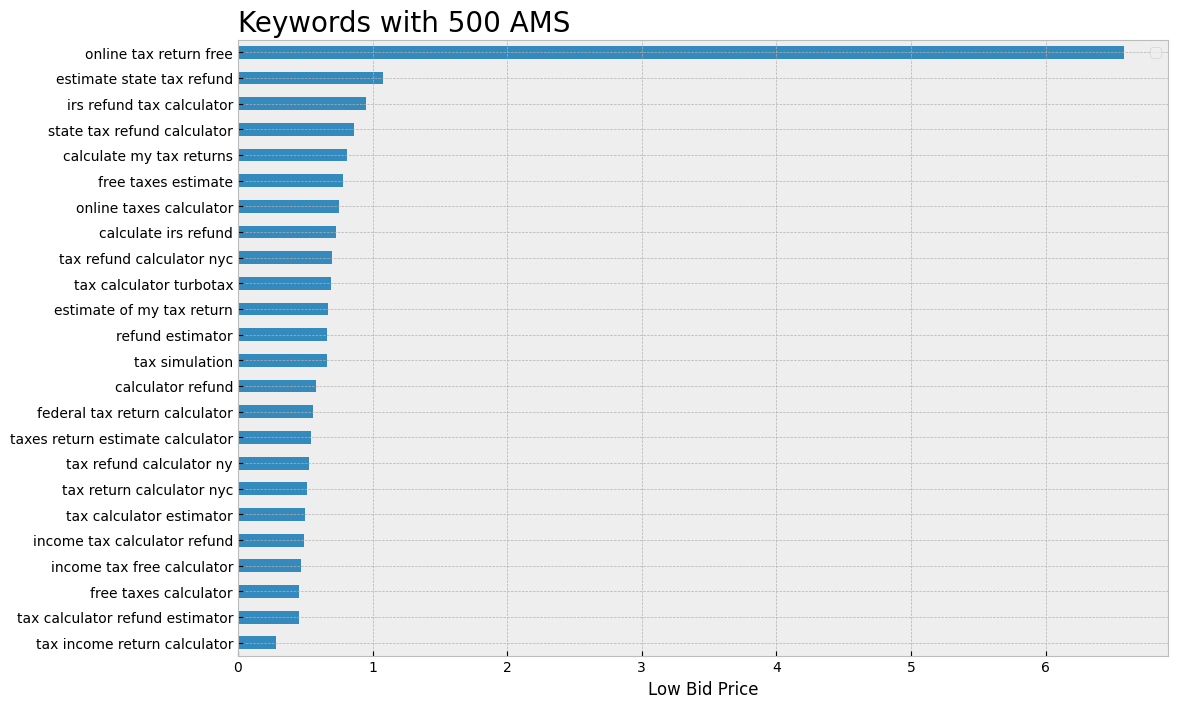

In [116]:
plt.rcParams["figure.figsize"] = (12,8)
plt.style.use("bmh")


sorted_data.plot.barh(x='Keyword', y = 'low bid')
plt.title('Keywords with 500 AMS', loc='left', fontsize = 20)
plt.legend('')
plt.xlabel("Low Bid Price")
plt.ylabel("")

plt.show()